In [2]:
import pandas as pd
df = pd.read_csv('./data/final_dataset/ml_data/ml_total.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 28 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   GeoID                                                       2106 non-null   int64  
 1   Tract                                                       2106 non-null   int64  
 2   avg_Change_Median_household_income                          2106 non-null   float64
 3   avg_Change_Median_home_value                                2106 non-null   float64
 4   avg_Change_calls_DOB                                        2106 non-null   float64
 5   avg_Change_calls_NYPD                                       2106 non-null   float64
 6   avg_Change_calls_DPR                                        2106 non-null   float64
 7   avg_Change_calls_DOT                                        2106 non-null   float64
 8 

In [4]:
df.describe()

,GeoID,Tract,avg_Change_Median_household_income,avg_Change_Median_home_value,avg_Change_calls_DOB,avg_Change_calls_NYPD,avg_Change_calls_DPR,avg_Change_calls_DOT,avg_Change_calls_DSNY,avg_Change_calls_TLC,...,avg_Change_Total_Population_with_Bachelor_Degree_or_Higher,avg_Change_Number_of_non-Hispanic_Caucasians,avg_Change_Number_of_African_Americans,avg_Change_Number_of_American_Indians_and_Alaskans,avg_Change_No_of_non-Hispanic_Asians,avg_Change_Number_of_non-Hispanic_Hawaiians,avg_Change_No_of_non-Hispanic_others,avg_Change_No_of_non-Hispanic_multi-racials,avg_Change_No_of_Hispanics_or_Latinos,yrs_to_gentrify
count,2.106000e+03,2106.000000,2.106000e+03,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,...,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,3.564990e+10,70383.674264,2.871029e+03,4403.913054,84.968908,131.032697,45.214439,85.889221,57.793956,32.969128,...,155.768649,195.356426,660.429936,63.669606,249.951885,0.372790,68.848722,132.448339,357.522948,1.114910
std,9.641619e+08,162191.205227,6.280432e+04,27608.631894,153.592739,190.020618,73.261970,135.631700,123.816272,191.005815,...,431.412751,613.394009,3074.342250,319.942856,874.293396,7.431071,239.768267,538.152245,624.147385,0.523188
min,3.400302e+10,100.000000,-4.476600e-03,-0.072105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.600501e+10,12203.000000,5.090131e+01,17.290796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,51.287373,12.858699,62.676924,0.000000,0.000000,0.000000,0.000000,0.000000,84.787389,1.000000
50%,3.604704e+10,25302.000000,7.432226e+01,67.919359,0.000000,99.645679,15.346963,54.322576,0.000000,0.000000,...,101.073998,55.060506,172.393241,0.000000,47.443940,0.000000,0.000000,60.922879,174.619751,1.000000
75%,3.607851e+10,55900.000000,9.966587e+01,95.815695,120.982808,188.550021,62.949871,109.088656,78.693910,0.000000,...,167.907585,148.068990,529.203988,24.638281,184.784255,0.000000,32.317455,153.307315,407.627485,1.000000
max,4.210395e+10,982100.000000,1.599005e+06,559184.555857,1700.000000,5200.000000,900.000000,1700.000000,1700.000000,5533.333333,...,15037.500000,11784.153435,112500.000000,7800.000000,18250.000000,288.888889,5140.000000,20200.000000,11726.315789,6.000000


In [5]:
df.yrs_to_gentrify.unique()

array([2, 1, 3, 4, 5, 6])

/Users/Yan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Yan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Yan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Yan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Yan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Yan/anaconda3/lib/python3.8/site-packages/seaborn/dis

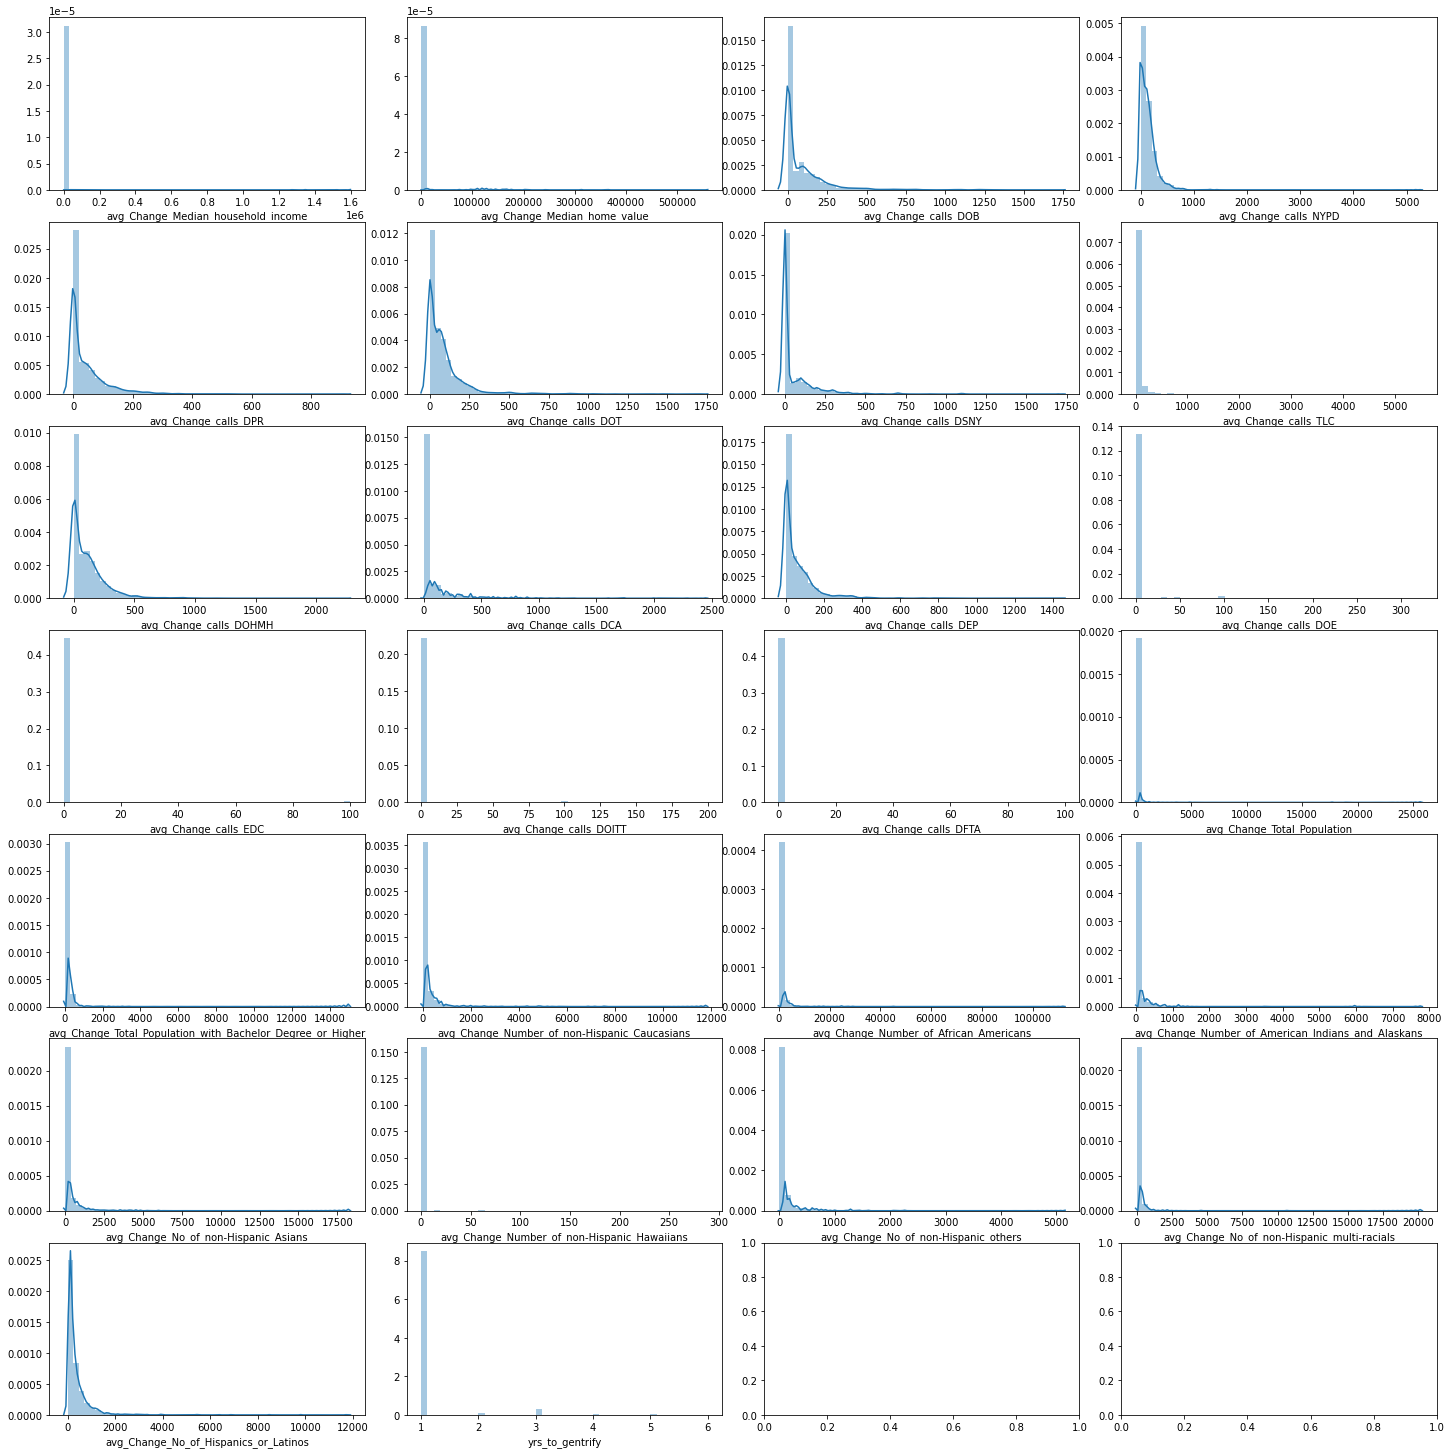

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axs = plt.subplots(ncols = 4, nrows = 7, figsize=(20,20))
fig.tight_layout()
c_count = 0
r_count = 0
for column in [x for x in df.columns.tolist() if x not in ['GeoID','Tract']]:
    if c_count == 4:
        c_count = 0
        r_count = r_count+1
    sns.distplot(df[column], kde= True, ax = axs[r_count][c_count])
    c_count = c_count + 1
fig.savefig('distribution.png')

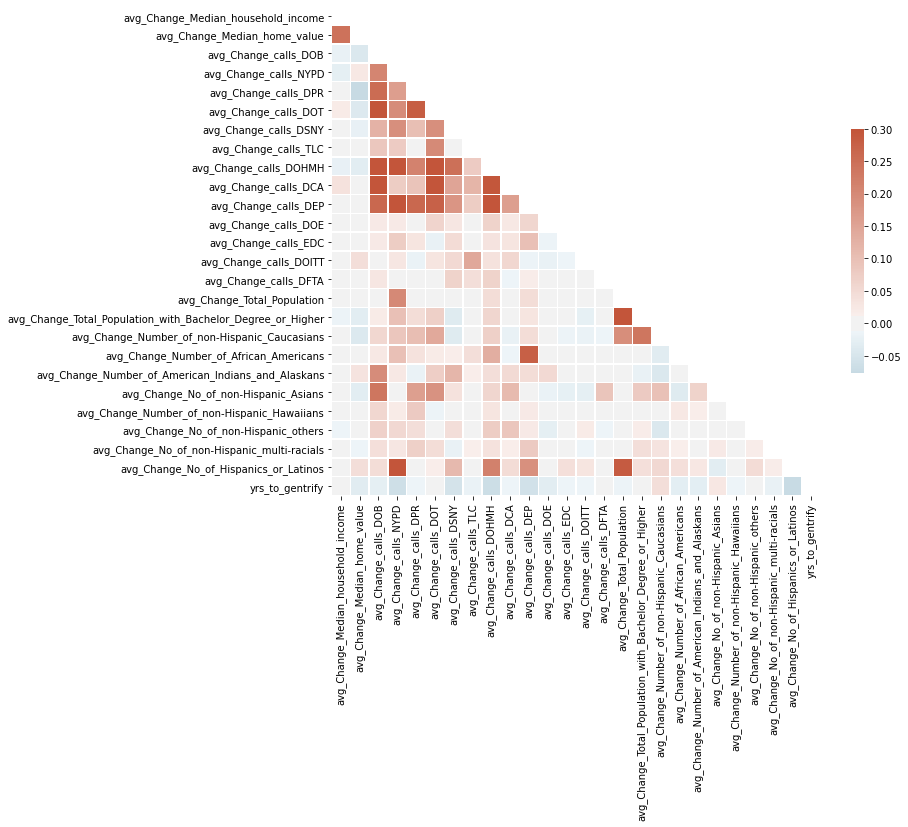

In [7]:
import numpy as np
# Compute the correlation matrix
cols = [x for x in df.columns.tolist() if x not in ['GeoID','Tract']]
corr = df[cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
f.savefig('Corr_matrix.png')

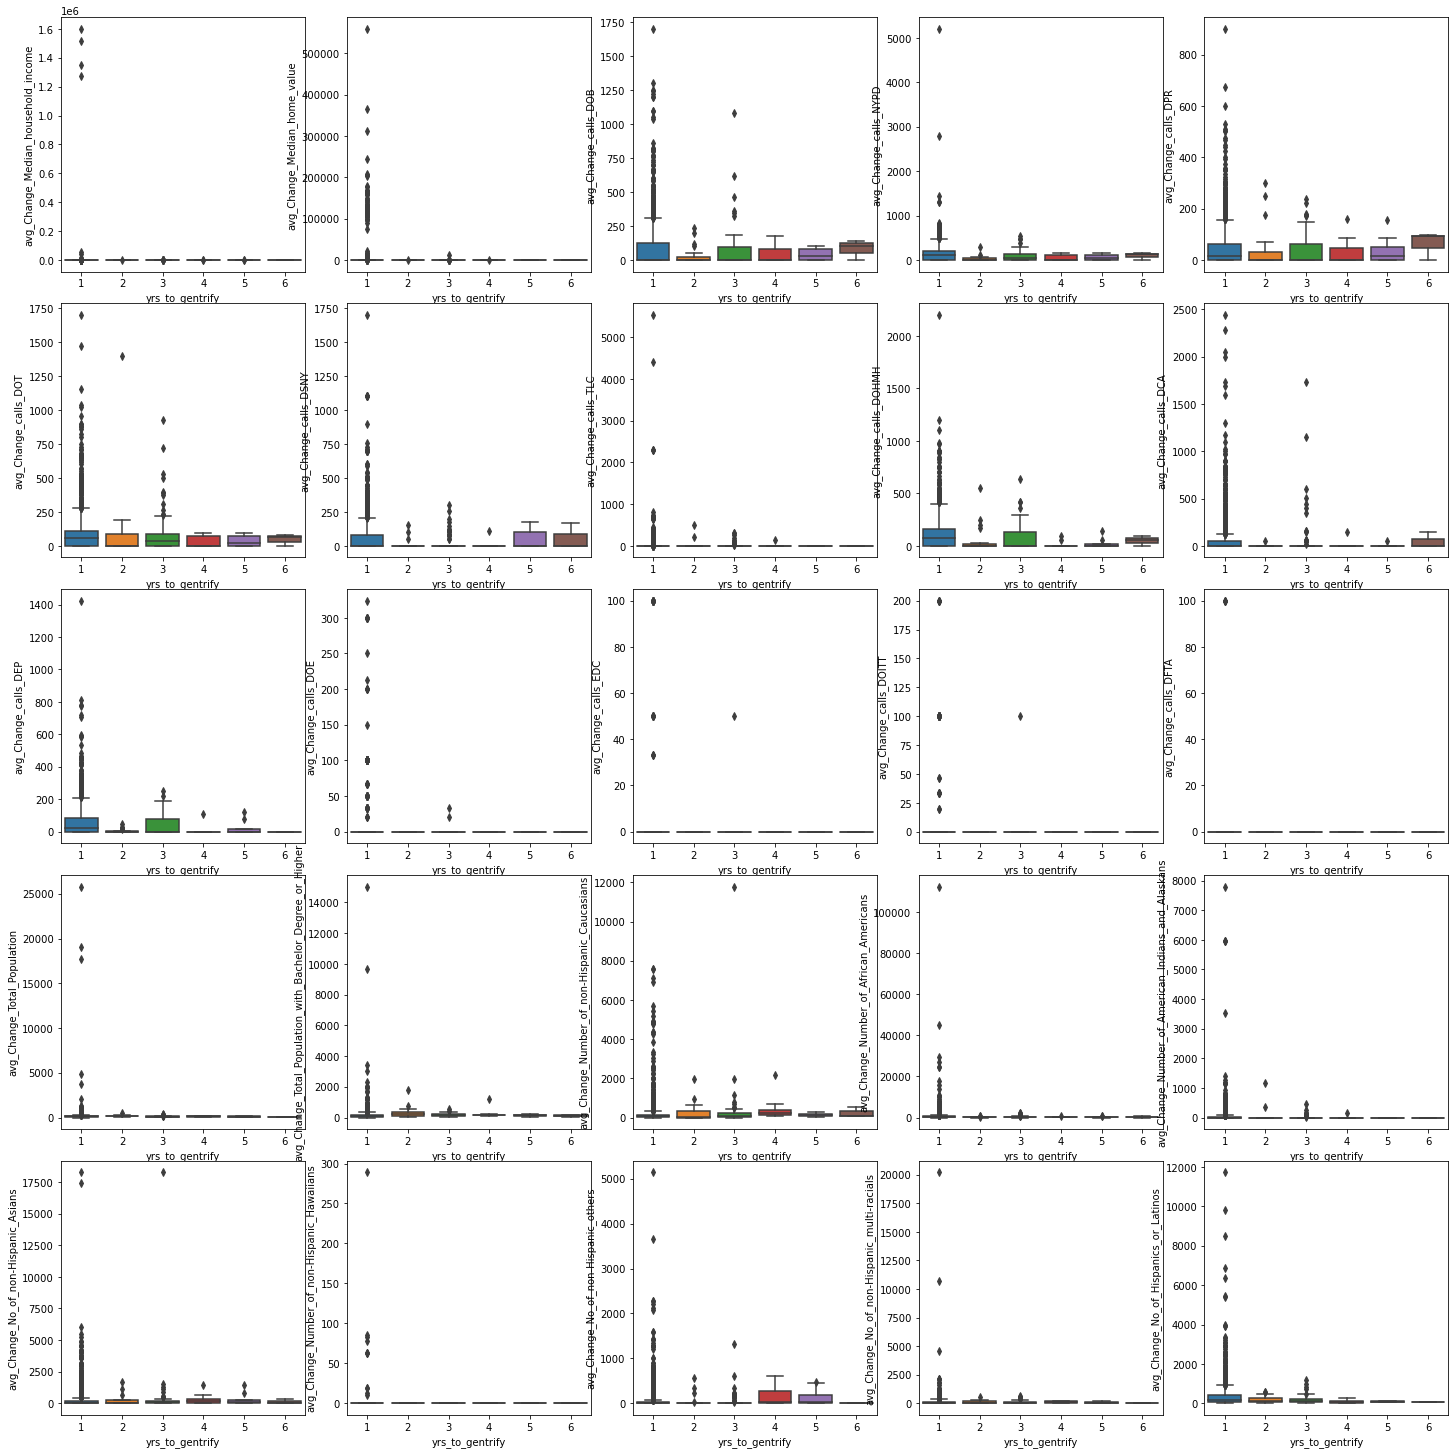

In [36]:
fig, axs = plt.subplots(ncols = 5, nrows = 5, figsize=(20,20))
fig.tight_layout()
c_count = 0
r_count = 0
for column in [x for x in df.columns.tolist() if x not in ['GeoID','Tract','yrs_to_gentrify']]:
    if c_count == 5:
        c_count = 0
        r_count = r_count+1
    sns.boxplot(x = df['yrs_to_gentrify'], y = df[column],ax=axs[r_count][c_count])
    c_count = c_count + 1
fig.savefig('boxplots.png')

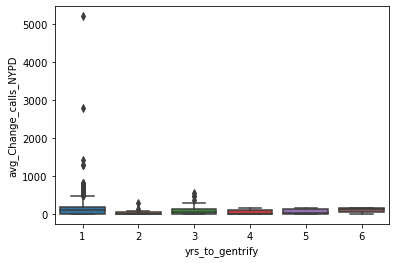

In [35]:
sns.boxplot(x = df['yrs_to_gentrify'], y = df['avg_Change_calls_NYPD'])

In [58]:
len(mean_data['2012'].columns)

26

In [8]:
data = {}

for year in range(2010,2019):
    print(year)
    d = pd.read_csv('./data/final_dataset/merged_'+str(year)+'.csv', dtype={'GeoID': str, 'Tract':str, 'Total Population with Bachelor Degree or Higher':float})
    if year == 2010:
        d.rename(columns={d.columns[15] : 'Total_Population'}, inplace = True)

    for name in d.columns:
        d.rename(columns={name : name.replace(' ', '_')}, inplace = True)
    d.set_index('GeoID', inplace=True)
    data[str(year)] = d
gen_tracts = pd.read_csv('./data/gentrified_tract/new_gentrified_tracts.csv', dtype = {'geoid' : str, 'tract' : str})
gen_tracts = gen_tracts.rename(columns = {'geoid' : 'GeoID', 'tract' : 'TRACT'})

mean_data={}
for year in range(2011,2019):
    print(str(year))
    df = pd.DataFrame(columns = ['Year','Median_household_income','Median_home_value','calls_DOB', 'calls_NYPD', 'calls_DPR', 'calls_DOT','calls_DSNY', 'calls_TLC', 'calls_DOHMH', 'calls_DCA','calls_DEP', 'calls_DOE', 'calls_EDC', 'calls_DOITT', 'calls_DFTA','Total_Population','Total_Population_with_Bachelor_Degree_or_Higher', 'Number_of_non-Hispanic_Caucasians', 'Number_of_African_Americans','Number_of_American_Indians_and_Alaskans', 'No_of_non-Hispanic_Asians','Number_of_non-Hispanic_Hawaiians', 'No_of_non-Hispanic_others','No_of_non-Hispanic_multi-racials', 'No_of_Hispanics_or_Latinos'])
    geoids = gen_tracts[gen_tracts['Year'] == year].GeoID.values
    curr_year = year
    while(curr_year != 2009):
        row = pd.Series()
        row['Year'] = curr_year
        d = data[str(curr_year)]
        for feature in [ 'Median_household_income','Median_home_value','calls_DOB', 'calls_NYPD', 'calls_DPR', 'calls_DOT','calls_DSNY', 'calls_TLC', 'calls_DOHMH', 'calls_DCA','calls_DEP', 'calls_DOE', 'calls_EDC', 'calls_DOITT', 'calls_DFTA','Total_Population','Total_Population_with_Bachelor_Degree_or_Higher', 'Number_of_non-Hispanic_Caucasians', 'Number_of_African_Americans','Number_of_American_Indians_and_Alaskans', 'No_of_non-Hispanic_Asians','Number_of_non-Hispanic_Hawaiians', 'No_of_non-Hispanic_others','No_of_non-Hispanic_multi-racials', 'No_of_Hispanics_or_Latinos']:
            temp = d.loc[(d.index.isin(geoids))]
            row[feature] = temp[temp[feature] >= 0][feature].mean()
        df = df.append(row,ignore_index = True)
        curr_year = curr_year-1
    mean_data[str(year)] = df
    
        
        
        
        



2010
2011
2012
2013
2014
2015
2016
2017
2018
2011


<ipython-input-8-d03c4fa31111>:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  row = pd.Series()


2012
2013
2014
2015
2016
2017
2018


In [9]:
features_data = {}
for feature in ['Median_household_income','Median_home_value','calls_DOB', 'calls_NYPD', 'calls_DPR', 'calls_DOT','calls_DSNY', 'calls_TLC', 'calls_DOHMH', 'calls_DCA','calls_DEP', 'calls_DOE', 'calls_EDC', 'calls_DOITT', 'calls_DFTA','Total_Population','Total_Population_with_Bachelor_Degree_or_Higher', 'Number_of_non-Hispanic_Caucasians', 'Number_of_African_Americans','Number_of_American_Indians_and_Alaskans', 'No_of_non-Hispanic_Asians','Number_of_non-Hispanic_Hawaiians', 'No_of_non-Hispanic_others','No_of_non-Hispanic_multi-racials', 'No_of_Hispanics_or_Latinos']:
    cols_names = ['Year']
    for year in range(2011, 2019):
        cols_names.append('gentrified_in_'+str('year'))
    
    df =pd.DataFrame({'Year':[x for x in range(2010,2019)]}) 
    for year in range(2011,2019):
        dat = mean_data[str(year)]
        df['gentrified_in_'+str(year)]= dat[feature]
    df.set_index('Year', inplace = True)
    features_data[feature] = df

Median_household_income
Median_home_value
calls_DOB
calls_NYPD
calls_DPR
calls_DOT
calls_DSNY
calls_TLC
calls_DOHMH
calls_DCA
calls_DEP
calls_DOE
calls_EDC
calls_DOITT
calls_DFTA
Total_Population
Total_Population_with_Bachelor_Degree_or_Higher
Number_of_non-Hispanic_Caucasians
Number_of_African_Americans
Number_of_American_Indians_and_Alaskans
No_of_non-Hispanic_Asians
Number_of_non-Hispanic_Hawaiians
No_of_non-Hispanic_others
No_of_non-Hispanic_multi-racials
No_of_Hispanics_or_Latinos


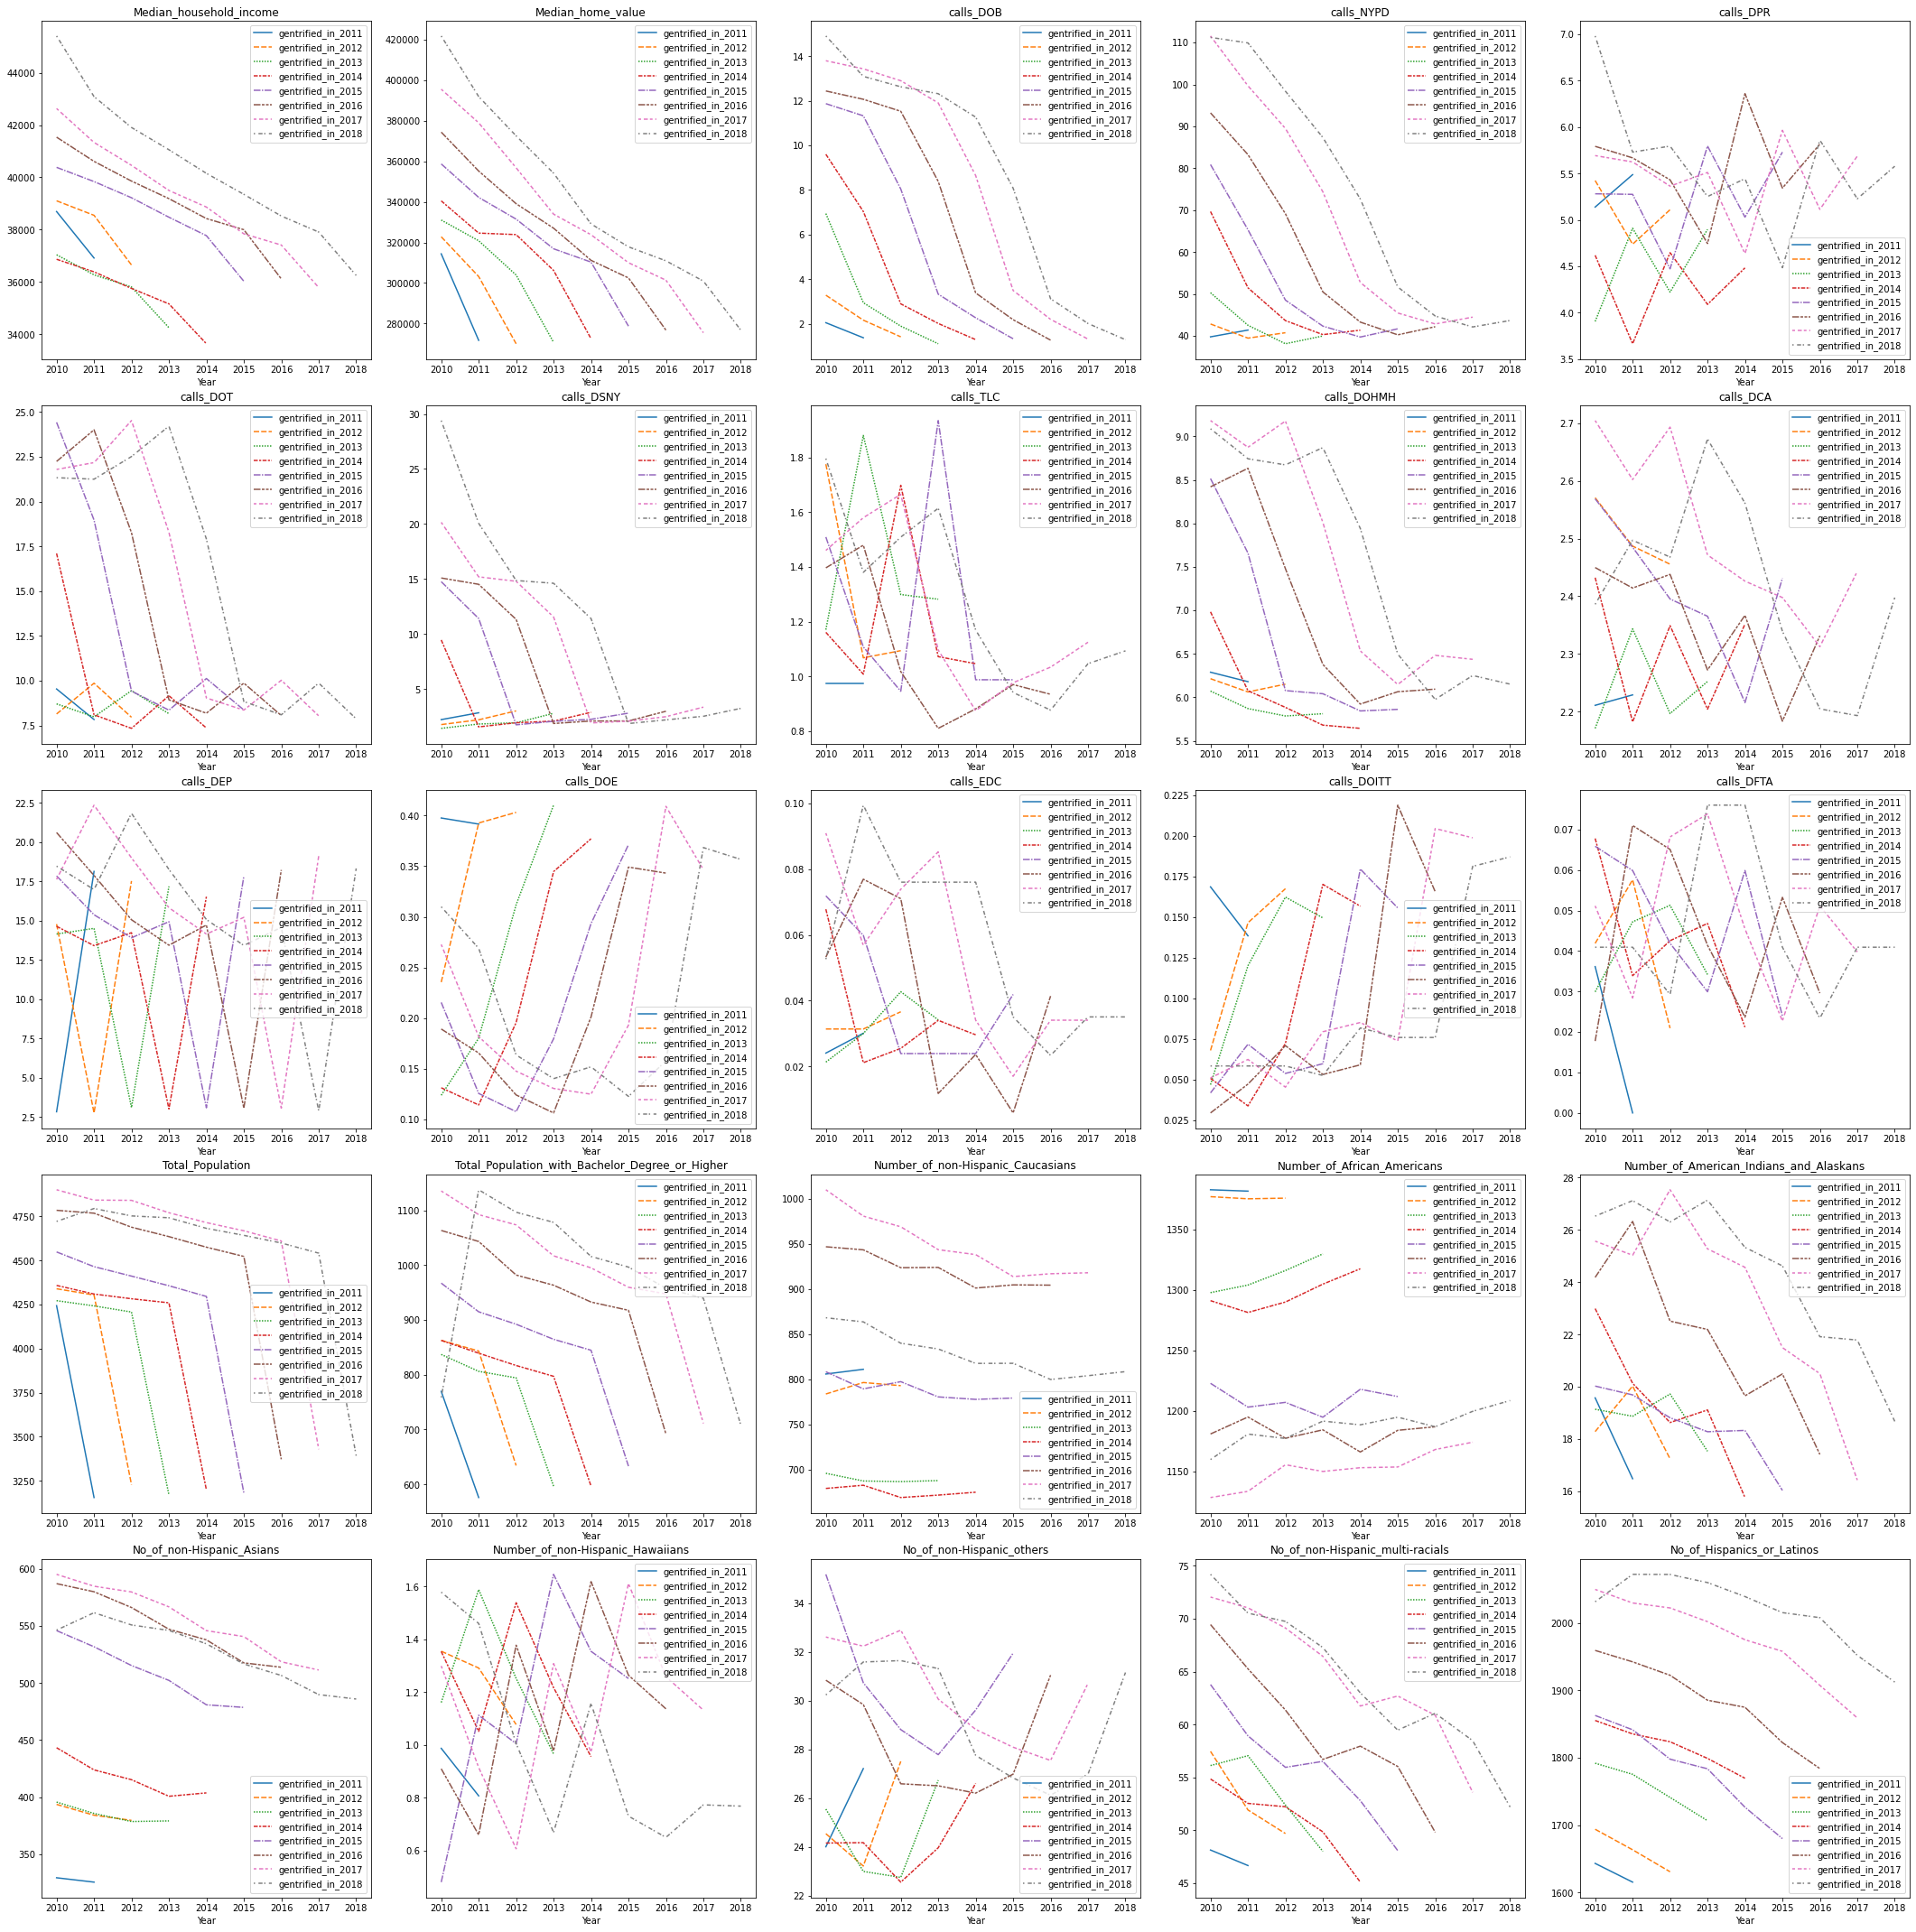

In [11]:
fig, axs = plt.subplots(ncols = 5, nrows = 5, figsize=(30,30))
fig.tight_layout(pad = 3)
c_count = 0
r_count = 0
dash_styles = ["",(4, 1.5),(1, 1),(3, 1, 1.5, 1),(5, 1, 1, 1),(5, 1, 2, 1, 2, 1),(2, 2, 3, 1.5),(1, 2.5, 3, 1.2), (2, 2, 10, 2)]
features = ['Median_household_income','Median_home_value','calls_DOB', 'calls_NYPD', 'calls_DPR', 'calls_DOT','calls_DSNY', 'calls_TLC', 'calls_DOHMH', 'calls_DCA','calls_DEP', 'calls_DOE', 'calls_EDC', 'calls_DOITT', 'calls_DFTA','Total_Population','Total_Population_with_Bachelor_Degree_or_Higher', 'Number_of_non-Hispanic_Caucasians', 'Number_of_African_Americans','Number_of_American_Indians_and_Alaskans', 'No_of_non-Hispanic_Asians','Number_of_non-Hispanic_Hawaiians', 'No_of_non-Hispanic_others','No_of_non-Hispanic_multi-racials', 'No_of_Hispanics_or_Latinos']

for feature in features:
    if c_count == 5:
        c_count = 0
        r_count = r_count+1
    data = features_data[feature]
    print(feature)
    sns.lineplot(data = data, ax = axs[r_count][c_count], dashes = dash_styles).set_title(feature)

    c_count = c_count + 1
fig.savefig('line_plot.png')

10
Median_household_income
Median_home_value
calls_NYPD
calls_DOT
Total_Population
Total_Population_with_Bachelor_Degree_or_Higher
Number_of_non-Hispanic_Caucasians
Number_of_African_Americans
No_of_Hispanics_or_Latinos
No_of_non-Hispanic_Asians


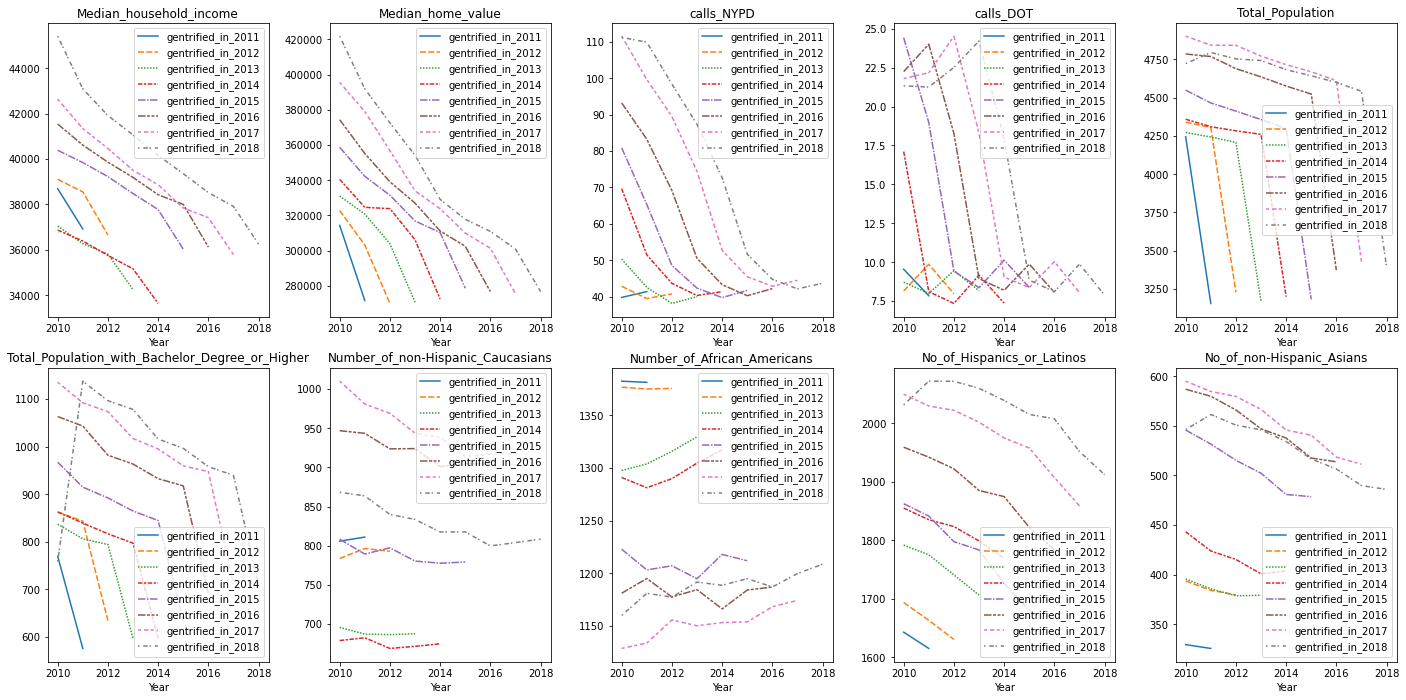

In [16]:
important_features=['Median_household_income','Median_home_value','calls_NYPD','calls_DOT','Total_Population','Total_Population_with_Bachelor_Degree_or_Higher','Number_of_non-Hispanic_Caucasians', 'Number_of_African_Americans', 'No_of_Hispanics_or_Latinos','No_of_non-Hispanic_Asians']
print(len(important_features))

fig, axs = plt.subplots(ncols = 5, nrows = 2, figsize=(20,10))
fig.tight_layout(pad = 3)
c_count = 0
r_count = 0
dash_styles = ["",(4, 1.5),(1, 1),(3, 1, 1.5, 1),(5, 1, 1, 1),(5, 1, 2, 1, 2, 1),(2, 2, 3, 1.5),(1, 2.5, 3, 1.2), (2, 2, 10, 2)]

for feature in important_features:
    if c_count == 5:
        c_count = 0
        r_count = r_count+1
    data = features_data[feature]
    print(feature)
    sns.lineplot(data = data, ax = axs[r_count][c_count], dashes = dash_styles).set_title(feature)
    c_count = c_count + 1
fig.savefig('important_line_plot.png')